In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Reshape, Dropout, LayerNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import TimeDistributed
sc = MinMaxScaler(feature_range = (0,1))
df2 = []
import pandas as pd

In [2]:
df = pd.read_csv('AIerror_ONU16_15S_Cycle&Ai&Grantold.csv', usecols=[1], engine='python')
print(df.head())
df = df.values
df = df.astype('float32')


    Ai
0  906
1  472
2  906
3  472
4  906


In [3]:
for i in range(len(df)):
    if(df[i] > 195000.0):
        df[i] = 195000.0
    df2.append(df[i])


In [4]:
print(df2)

[array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([906.], dtype=float32), array([472.], dtype=float32), array([13296.], dtype=float32), array([12431.], dtype=float32), array([8177.], dtype=float32), arra

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df2)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

30865 15203


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 50
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)

(30815, 50)
(30815,)
(15153, 50)


In [9]:
# reshape input to be [samples, time steps, features]
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [10]:
timesteps_ = look_back

inputs = Input(shape=(timesteps_,))
#inputs = LayerNormalization(axis=1)(inputs)
tgt1 = tf.keras.layers.Reshape((timesteps_,1),input_shape=(timesteps_,))(inputs)

tgt1 = LSTM(units=40,return_sequences = True, input_shape=(timesteps_,1))(tgt1)
tgt1 = Dropout(0.2)(tgt1)

tgt2 = LSTM(units=40,return_sequences = True)(tgt1)
tgt2 = Dropout(0.2)(tgt2)

tgt3 = LSTM(units=40,return_sequences = True)(tgt2)
tgt3 = Dropout(0.2)(tgt3)

tgt4 = LSTM(units=40)(tgt3)
tgt4 = Dropout(0.2)(tgt4)

predictions = Dense(1)(tgt4)

model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['mse','mae'])

history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_split=0.3) #[1,0,0], [0,0,1]

Epoch 1/100
675/675 [==============================] - 8s 11ms/step - loss: 0.0468 - mse: 0.0085 - mae: 0.0468 - val_loss: 0.0477 - val_mse: 0.0094 - val_mae: 0.0477
Epoch 2/100
675/675 [==============================] - 6s 9ms/step - loss: 0.0437 - mse: 0.0080 - mae: 0.0437 - val_loss: 0.0445 - val_mse: 0.0092 - val_mae: 0.0445
Epoch 3/100
675/675 [==============================] - 6s 10ms/step - loss: 0.0420 - mse: 0.0078 - mae: 0.0420 - val_loss: 0.0444 - val_mse: 0.0091 - val_mae: 0.0444
Epoch 4/100
675/675 [==============================] - 6s 9ms/step - loss: 0.0413 - mse: 0.0078 - mae: 0.0413 - val_loss: 0.0430 - val_mse: 0.0095 - val_mae: 0.0430
Epoch 5/100
675/675 [==============================] - 6s 10ms/step - loss: 0.0410 - mse: 0.0078 - mae: 0.0410 - val_loss: 0.0427 - val_mse: 0.0092 - val_mae: 0.0427
Epoch 6/100
675/675 [==============================] - 6s 10ms/step - loss: 0.0406 - mse: 0.0078 - mae: 0.0406 - val_loss: 0.0425 - val_mse: 0.0093 - val_mae: 0.0425
Epoch 

675/675 [==============================] - 6s 9ms/step - loss: 0.0394 - mse: 0.0076 - mae: 0.0394 - val_loss: 0.0411 - val_mse: 0.0086 - val_mae: 0.0411
Epoch 51/100
675/675 [==============================] - 6s 9ms/step - loss: 0.0394 - mse: 0.0076 - mae: 0.0394 - val_loss: 0.0412 - val_mse: 0.0085 - val_mae: 0.0412
Epoch 52/100
675/675 [==============================] - 6s 9ms/step - loss: 0.0395 - mse: 0.0076 - mae: 0.0395 - val_loss: 0.0412 - val_mse: 0.0085 - val_mae: 0.0412
Epoch 53/100
675/675 [==============================] - 6s 9ms/step - loss: 0.0394 - mse: 0.0076 - mae: 0.0394 - val_loss: 0.0411 - val_mse: 0.0087 - val_mae: 0.0411
Epoch 54/100
675/675 [==============================] - 6s 9ms/step - loss: 0.0394 - mse: 0.0076 - mae: 0.0394 - val_loss: 0.0411 - val_mse: 0.0087 - val_mae: 0.0411
Epoch 55/100
675/675 [==============================] - 6s 9ms/step - loss: 0.0394 - mse: 0.0076 - mae: 0.0394 - val_loss: 0.0413 - val_mse: 0.0087 - val_mae: 0.0413
Epoch 56/100
675/

675/675 [==============================] - 6s 9ms/step - loss: 0.0390 - mse: 0.0074 - mae: 0.0390 - val_loss: 0.0415 - val_mse: 0.0088 - val_mae: 0.0415
Epoch 100/100
675/675 [==============================] - 6s 9ms/step - loss: 0.0389 - mse: 0.0073 - mae: 0.0389 - val_loss: 0.0417 - val_mse: 0.0090 - val_mae: 0.0417


timesteps :  50
mae  :  0.0019885674118995667


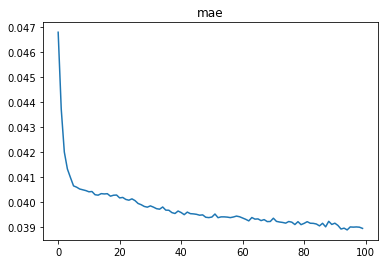

In [13]:
print('timesteps : ',timesteps_)
plt.plot(history.history['mae'])
plt.title('mae')
print('mae  : ',mae(history.history['mae'], history.history['val_mae']))

timesteps :  50


Text(0.5, 1.0, 'mse')

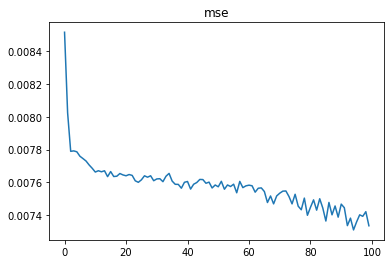

In [14]:
print('timesteps : ',timesteps_)
plt.plot(history.history['mse'])
plt.title('mse')

In [17]:
#模型評估
trainPredict = model.predict(trainX, batch_size=32)
#reset model
model.reset_states()
testPredict = model.predict(testX, batch_size=32)

In [18]:
from sklearn.metrics import mean_squared_error as mse
# make predictions
#trainPredict = model.predict(trainX)
#testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mse(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 17328.68 RMSE
Test Score: 17455.72 RMSE
Train Score: 87.86 RMAE
Test Score: 88.86 RMAE


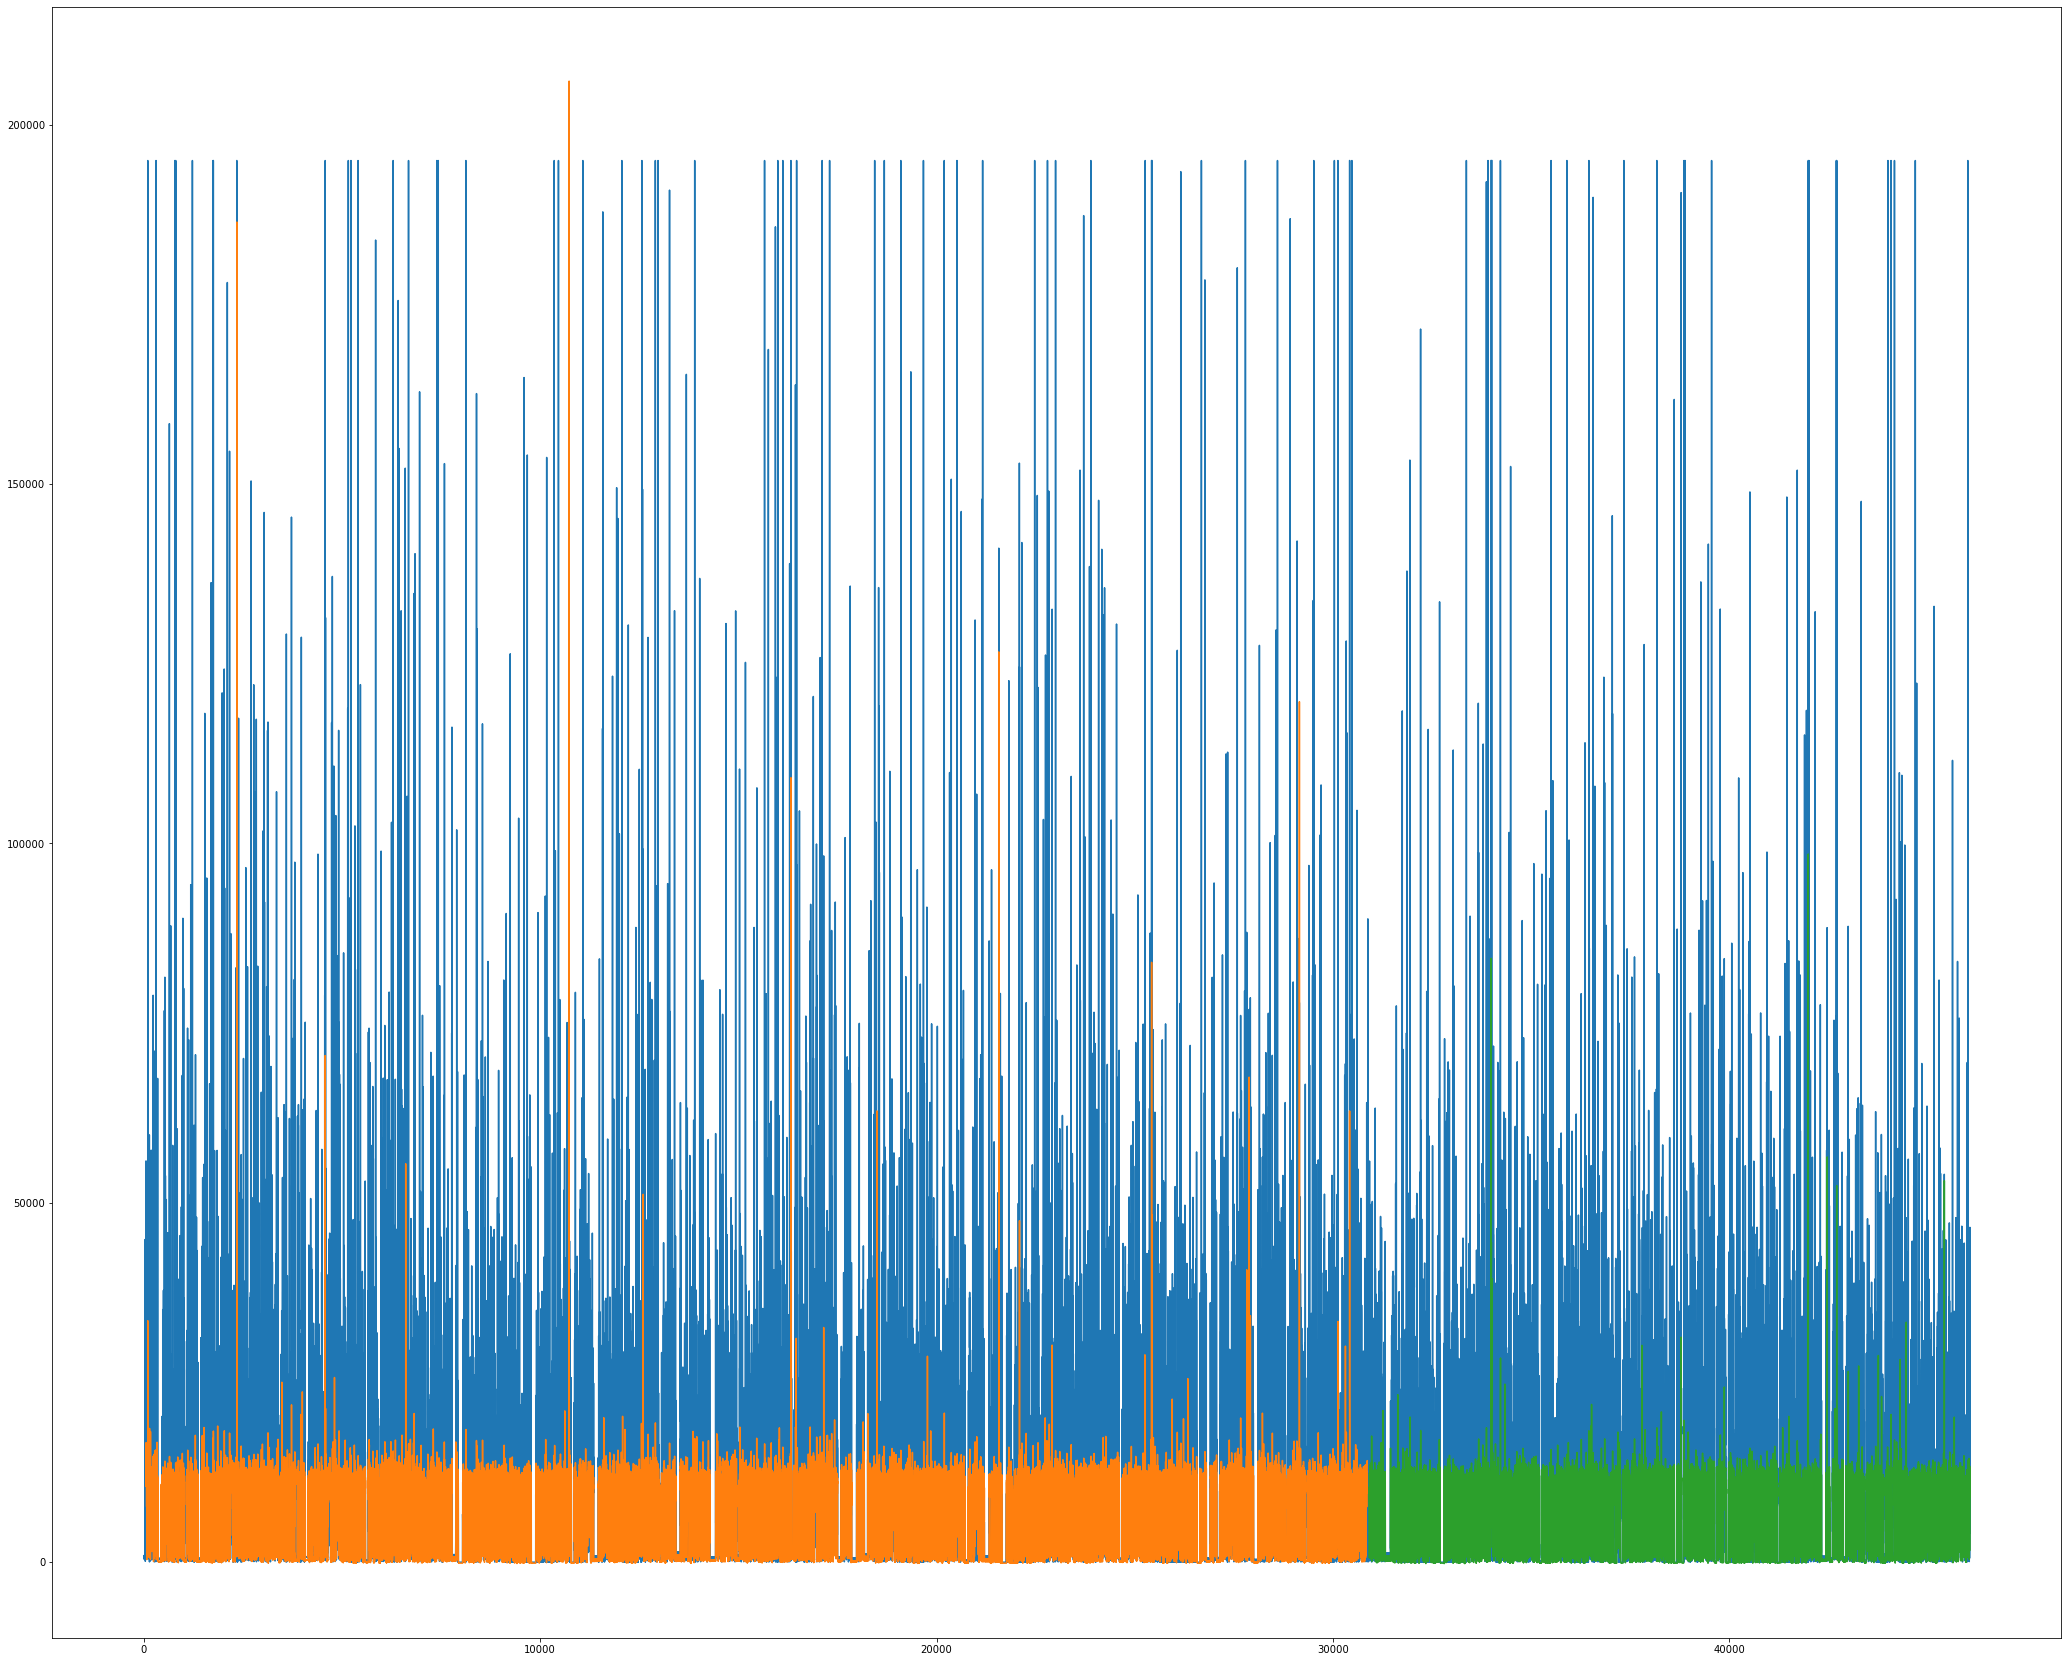

In [19]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset), :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(36, 30))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [20]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 50, 1)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 50, 40)            6720      
_________________________________________________________________
dropout (Dropout)            (None, 50, 40)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 40)            12960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 40)           

In [21]:
from sklearn.metrics import r2_score
train_Y = trainY.T
test_Y = testY.T
print(r2_score(train_Y, trainPredict))
print(r2_score(test_Y, testPredict))

0.1039623020047531
0.1026929953339829


In [22]:
print(trainPredict.shape)

(30815, 1)


In [23]:
model.save('U08D00_AIerror_ONU16_test0124_4layer.h5', include_optimizer=False)